<a href="https://colab.research.google.com/github/MatheusBacca/Atividade-2---Chroma-Key/blob/main/Atividade_Chroma_Key.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas necessárias para a atividade

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

import matplotlib.pyplot as plt
import numpy as np
import cv2

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Lendo as imagens a serem utilizadas na atividade

In [18]:
dict_imagens = {
    "formas": cv2.imread('/content/gdrive/MyDrive/FACULDADE/2023.1/Visão Computacional/Trabalho Bimestral/Imagens/Formas/formas.bmp'),
    "rainha": cv2.imread('/content/gdrive/MyDrive/FACULDADE/2023.1/Visão Computacional/Trabalho Bimestral/Imagens/Rainha/rainha.bmp'),
    "corvos": cv2.imread('/content/gdrive/MyDrive/FACULDADE/2023.1/Visão Computacional/Trabalho Bimestral/Imagens/Corvos/corvos.bmp'),
    "corvo": cv2.imread('/content/gdrive/MyDrive/FACULDADE/2023.1/Visão Computacional/Trabalho Bimestral/Imagens/Corvo/corvo.bmp'),
    "background": cv2.imread('/content/gdrive/MyDrive/FACULDADE/2023.1/Visão Computacional/Trabalho Bimestral/Imagens/background.bmp')
}

# Setando os valores de verde mais fraco e forte para utilizar na montagem da máscara

In [10]:
verde_escuro = np.array([0, 50, 0])
verde_claro = np.array([80, 255, 80])

# Criando função genérica para aplicar os filtros nas iamgens


In [12]:
def aplica_filtro(imagem):
    # 1.0: removendo chroma key da imagem
    mascara = cv2.inRange(imagem, verde_escuro, verde_claro)

    # 2.0: Aplicando a máscara na imagem original
    imagem_mascarada = cv2.bitwise_and(imagem, imagem, mask = mascara)

    # 3.0: Aplicando o filtro Sobel na imagem (separada em eixo X e Y)
    sobel_x = cv2.Sobel(imagem_mascarada, cv2.CV_64F, 1, 0, ksize = 5)
    sobel_y = cv2.Sobel(imagem_mascarada, cv2.CV_64F, 0, 1, ksize = 5)
    sobel = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

    return sobel, mascara

# Aplicando os filtros nas imagens selecionadas

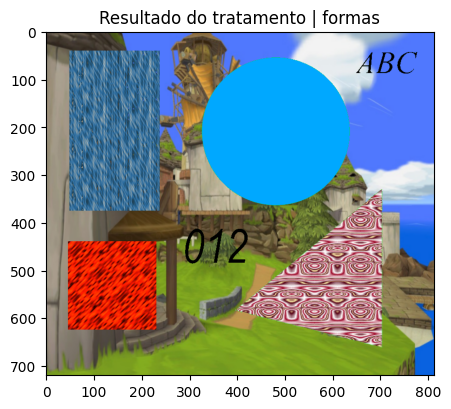

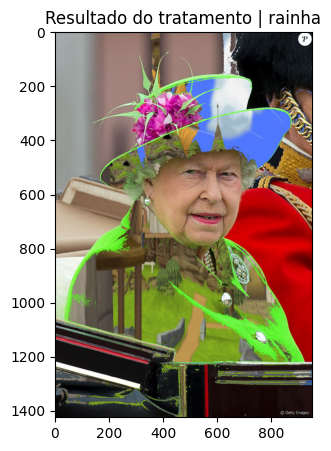

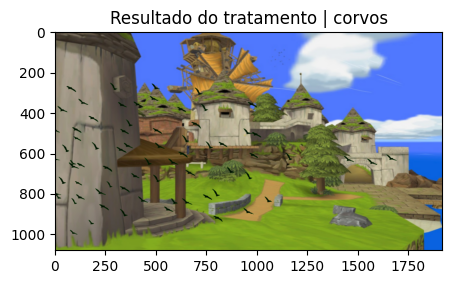

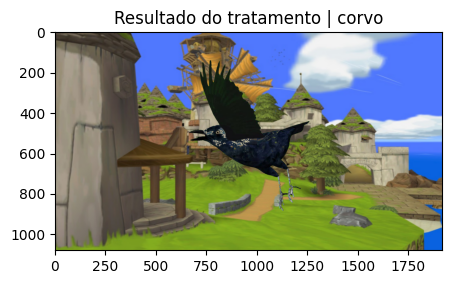

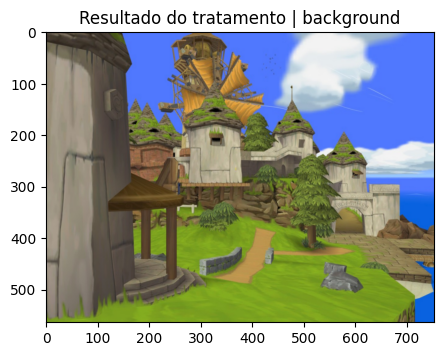

In [22]:
for nome, imagem in dict_imagens.items():
    # Aplicando os filtros na imagem selecionada e resgatando a mascara
    sobel, mascara = aplica_filtro(imagem)
    cv2.imwrite(f'/content/gdrive/MyDrive/FACULDADE/2023.1/Visão Computacional/Trabalho Bimestral/Imagens/{nome}/{nome}-binarizacao.png', mascara)

    # Convertendo a imagem de fundo para o mesmo tamanho da imagem selecionada
    novo_background = cv2.resize(dict_imagens["background"], (imagem.shape[1], imagem.shape[0]))

    # Aplicando a máscara no background
    background_mascarado = cv2.bitwise_and(novo_background, novo_background, mask = mascara)

    # Aplicando a máscara invertida à imagem original
    imagem_mascarada = cv2.bitwise_and(imagem, imagem, mask = cv2.bitwise_not(mascara))

    # Adicionando a imagem original mascarada e a imagem de fundo mascarada
    imagem_tratada = cv2.add(imagem_mascarada, background_mascarado)

    # Printando o resultado do processo
    plt.figure(figsize = (5, 5))
    
    plt.imshow(cv2.cvtColor(imagem_tratada, cv2.COLOR_BGR2RGB))
    
    plt.title(f'Resultado do tratamento | {nome}')
    
    plt.show()

    # Salvando demais passos do processo
    cv2.imwrite(f'/content/gdrive/MyDrive/FACULDADE/2023.1/Visão Computacional/Trabalho Bimestral/Imagens/{nome}/{nome}-gaussiano.png', cv2.GaussianBlur(imagem, (5, 5), 0, 0))
    cv2.imwrite(f'/content/gdrive/MyDrive/FACULDADE/2023.1/Visão Computacional/Trabalho Bimestral/Imagens/{nome}/{nome}-tratado.png', imagem_tratada)